Python assesment CH273

###### Step 1: Plot on the same graph the (experimentally measured) activity coefficients of Li+ and Cl- ions in water (at room temperature) as a function of the square root of the ionic strength. The data can be found in the LiCl.dat file within the STUFF directory in the CH273 Python framework. Note that the first line of  LiCl.dat is a header containing information about its content (including units!)


In [1]:
import numpy as np
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from STUFF.poisson_disc import Grid

Useful packages above 

In [2]:
act_exp_LiCl=np.loadtxt('./STUFF/LiCl.dat') #imported data from LiCl datat file

Imported the LiCl experimental data 
Column 1 = Ionic strength 
Column 2 = Activity Coefficienet of Li+
Column 3 = Activity Coefficient of Cl-

###### Step 2: Add to the same graph the prediction of the Debye-Hückel limiting law for LiCl. Discuss your result with reference to the experimental data. 

In [3]:
# Debye-Hückel limiting law
c=np.arange(0, 100, dtype=float) # concentration
nc=len(c) 

# Ionic strength, [mol/Kg]
ist=np.zeros(100) # Ionic strength
lg=np.zeros(100) # Ln of the mean activity
A=0.509 # Value of A found for ions 

for i in range(0,nc):
    ist[i]=c[i] # Ionic strength = concentration  [mol/Kg]^{1/2}
    lg[i]=-A*np.sqrt(ist[i]) # Log of the mean activity coefficient

I found the concentration, ionic strength and mean activity in thier necessary forms. Then a graph on the log(base e) mean acitivty against the function of the square root of ionic strength.

###### Step 4: Add to the plot obtained in Step 2 the prediction (for LiCl) of the DH-SiS model, using Eq. (1) and (2) in this paper. All the numbers you need are in that very same paper (finding them and, crucially, making sense of them is the fun bit). Sit down with pen and paper and break down the big equations into small chunks, collecting all the constants you need as you go along. You can do it! Hint: I found it easier to plot the entire thing as log10(activity) as a function of the square root of the ionic strength. Hint n.2: you can actually check whether you got it right by comparing your result with that of Fig. 2 in the paper.

In [4]:
pi=3.14159265359
delta=715.06
sigma=0.99704
AN=6.02214086*10**23
Iw=act_exp_LiCl[:,0] #inserted from the LiCl data file
B = 0.0032849 # All of the constants were found in appendix a in the paper
k=B*Iw # equation (k = B*1**1/2)found in appendix a in the paper

In [5]:
AdivideB=155.273
bplus=120
bminus=362
a=348 # All constants found in table 1 of the paper

In [6]:
lpout=(-AdivideB*(k/(1+k*a)))
lpin=(1-((2*np.exp(k*(a-bplus))-k*(a-bplus)-2)/(1+k*bplus)))
lpl=lpout*lpin # equation for log (activity coefficient plus)

In [7]:
lmout=(-AdivideB*(k/(1+k*a)))
lmin=(1+((2*np.exp(k*(bminus-a))-2*k*(bminus-a)-2)/(1+k*bminus)))
lml=lmout*lmin # equation for log (activity coefficient minus)

Using k=BI, where I is ionic strength, and constants from the paper, I found values of log activity coefficient that vary by ionic strength of LiCl. 

The graph contains step 1,2 and 4

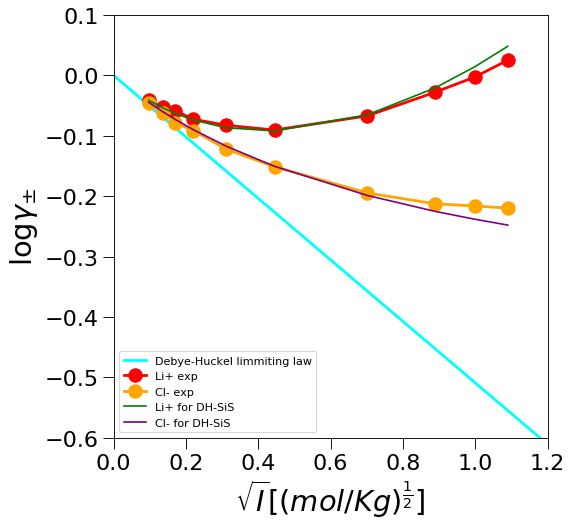

In [8]:
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(np.sqrt(ist[:]), (lg[:]), linewidth=2.5, color='cyan', label="Debye-Huckel limmiting law") # x is the square root of ionic strength of LiCl and y is the log mean activity coefficient
plt.plot(act_exp_LiCl[:,0], np.log10(act_exp_LiCl[:,1]), '-ok', markerfacecolor='red', markersize=12, markeredgecolor='red', 
         linewidth=2.5, color='red', label="Li+ exp")  # x is the square root of ionic strength of LiCl and y is the log10 experimental activity coefficient for Li+
plt.plot(act_exp_LiCl[:,0], np.log10(act_exp_LiCl[:,2]), '-ok', markerfacecolor='orange', markersize=12, markeredgecolor='orange', 
         linewidth=2.5, color='orange', label="Cl- exp")  # x is the square root of ionic strength of LiCl and x is the log10 experimental activity coefficient for Cl-
plt.plot(act_exp_LiCl[:,0], (lpl), linewidth=1.5, color='green', label="Li+ for DH-SiS") # x is the square root of ionic strength of LiCl and y is the log activity coefficient of Li+
plt.plot(act_exp_LiCl[:,0], (lml), linewidth=1.5, color='purple', label="Cl- for DH-SiS") # x is the square root of ionic strength of LiCl and y is the log activity coefficient of Cl-                 

plt.xlabel('$\sqrt{I} [(mol/Kg)^\\frac{1}{2}]$', fontsize=26) # label for x axis 
plt.ylabel('$\log\gamma_{\pm}$', fontsize=26) # label for y axis 
plt.xlim(0,1.2) # x axis range
plt.ylim(-0.6,0.1) # y axis range

plt.legend()
plt.show()

 2. The Debye-Hückel limiting law only holds for ions with very low ionic strengths/concentrations. As seen by the graph, as the experimental ionic strengths increase for both the Li+ and Cl- ions the values no longer follow the line for the Debye-Hückel limiting law.

###### Step 3: Discuss (within one or more Markdown cells) similarities and differences between the Debye-Hückel theory and its modification for ions of dissimilar size (DH-SiS). While you are welcome to harness the almighty power of Google, I have highlighted in red a few relevant bits and bobs within these papers [SIS_1.pdf, SIS_2.pdf, SIS_3.pdf] to give you a solid starting point. Embed in your Notebook (following the instructions in the Embedding_Images.ipynb Notebook I have put into the CH273 Python Framework folder) a schematics depicting the ionic atmosphere of an anion A surrounded by a mixture of cations B of two different sizes: B1 = A and B2 = 2A

Similarities between the Debye-Hückel theory and its modification for ions of dissimilar size (DH-SiS)

Both theories still include the original Debye-Hückel theory by including the primitive model of electrolyte solutions which states that ions are modelled as hard spheres with point chargers in their centre and the solvent is a continuous, homogeneous medium with a dielectric constant.

Differences between the Debye-Hückel theory and its modification for ions of dissimilar size (DH-SiS)

The original Debye-Hückel theory is for ions of similar size however the modification of smaller-ion shell treatment is for ions of dissimilar sizes and also different distances between ions. DH-SiS states that the distances between a central ion (A) and a surrounding ions (B) are (a) for ions of the same charge and (b) for ions of different charges. So there are two different distances of closest approach between A and B unlike like Debye-Hückel theory. When a < b the SiS gives ionic repulsion and when a > b the SiS gives extra ionic attraction. When A ions are smaller than B ions, ions can occupy the distance between the r=a and r=b (r is the radius from central ion A), which is a smaller shell. When A ions are bigger than B, the ions cannot have a close distance.

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url ="https://v1.padlet.pics/1/image.webp?t=c_limit%2Cdpr_2%2Ch_196%2Cw_278&url=https%3A%2F%2Fpadlet-uploads.storage.googleapis.com%2F771850867%2Fbfe32c88e5bda2f863ccb756b4e7dbb6%2FIonic_Atmosphere.png", width=400)

###### Step 5: For your viewing pleasure, craft a 3D plot (i.e. a surface) of the activity of Cl- as a function of both the ionic strength (same as above) and the Cl--Cl- closest internuclear distance in the ionic solution (i.e. the b- parameter you have been using as constant up to now). Study the b- range from, say, 10 to 1000 pm. Comment on the influence of this particular parameter on the activity of the Cl- ions, with specific reference to the low- and high- ionic strength regions. May the Force be with you...